## Notebook for labeled dataset generation for AE4317 Autonomous Flight of Micro Air Vehicles

This notebook assumes you already have a dataset of images captured by the drone, both in real life and in simulation. In general the bigger your dataset the better, however you should always keep in mind that having bad data will lead to a bad model. So make sure that the images in your dataset are representative of the environment in which your drone will fly. Later through data augmentation we can make the model more robust.

The approach taken in these notebook is using depth maps of the image to classify each image with a corresponding control command to the drone, e.g. 'left', 'forward', 'right'. If you want to take the same approach, then this you can use this notebook. If you want to label your images in a different way, or maybe label them by hand, then you might be better off making your own notebook!

You will have to do the conversion to depth maps yourself, luckily this is rather easy using [Depth-Anything](https://github.com/LiheYoung/Depth-Anything "Depth Anything: Unleashing the Power of Large-Scale Unlabeled Data"). You can choose which model to use, the larger the model the better your depth maps will be, but it is also computationally more expensive. To be able to run this notebook for your depth maps, it is important to follow a certain file structure. Here we create separate folder for real life images and simulator images, such that you can augment the simulator images to better represent the real situation. The structure is as follows:
- all images captured in real life should be in a folder called `real_images`
- all depth maps corresponding to the real life images should be in a folder called `real_images_depth`
- all images captured in the simulator should be in a folder called `sim_images`
- all depth maps corresponding to the simulator images should be in a folder called `sim_images_depth`
- the names of the depth map images should be the original name, appended with _depth, e.g. `11549407.jpg` becomes `11549407_depth.png` (Depth-Anything outputs a .png, ceheck this)

A helper file is provided that works with the current version (24-3-24) of Depth-Anything, called `run_MAV.py`. Make sure to copy this file into the main directory of Depth-Anything, after which you simply run the script. Make sure to update the locations of your image folders!

### Imports

In [1]:
from utils import *
import os
import matplotlib.pyplot as plt
import pandas as pd

Let's show some data to see what we are working with. Here we can also see the effect of making the simulator image more realistic. Feel free to change the `make_realistic` function in `utils.py`.

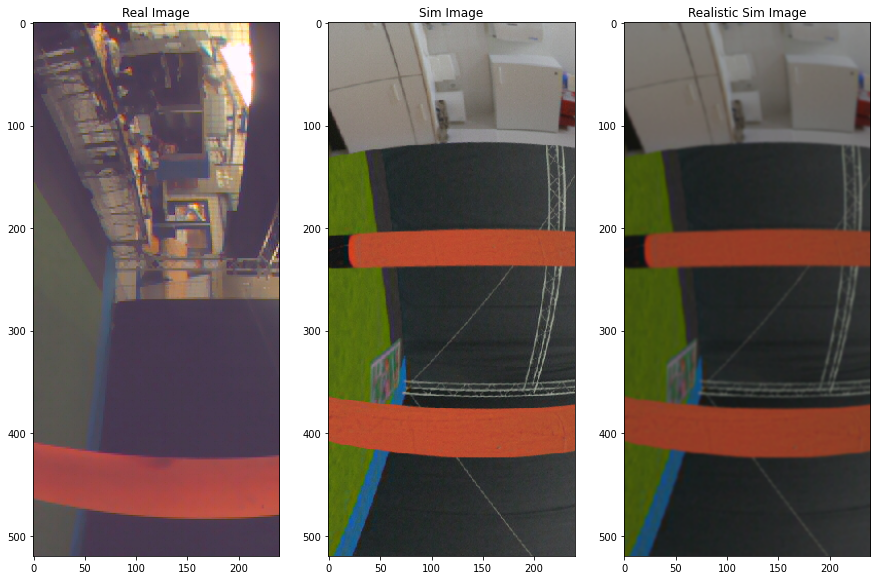

In [2]:
real_images_folder = 'real_images'
sim_images_folder = 'sim_images'

# Load the images
real_image_example = plt.imread(os.path.join(real_images_folder, os.listdir(real_images_folder)[0]))
sim_image_example = plt.imread(os.path.join(sim_images_folder, os.listdir(sim_images_folder)[0]))

# Augment to simulator image to make it more realistic
realistic_sim_image_example = make_realistic(sim_image_example)

# Show the images
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(real_image_example)
ax[0].set_title('Real Image')
ax[1].imshow(sim_image_example)
ax[1].set_title('Sim Image')
ax[2].imshow(realistic_sim_image_example)
ax[2].set_title('Realistic Sim Image')
plt.show()

### Create labels
The images are classified based on the generated depth maps. The generate labels function loops over all images, calculates the label and saves both the original and a mirrored version to a final image folder called `all_images`. The label is calculated based on the average depth of the image regions, where by default it splits the image into 3 regions (corresponding to left, forward and right) and crops the top and bottom 25%. The latter is done since this containts little important information. You could also opt to split the image into for example 5 or more regions.

In [3]:
# Folder where the entire dataset is stored
all_images_folder = 'all_images'

# Create dataframe to store the images with their labels
labeled_images = pd.DataFrame(columns=['filename', 'left', 'forward', 'right'])

# Label both the real and simulator images
labeled_images = generate_labels(real_images_folder, all_images_folder, labeled_images, top_bottom_crop=0.1)
labeled_images = generate_labels(sim_images_folder, all_images_folder, labeled_images, top_bottom_crop=0.1, realistic=True)

# Save the dataframe
labeled_images.to_csv('labeled_images_new_3.csv', index=False)

Generating labels for images in real_images...


100%|██████████| 7917/7917 [03:24<00:00, 38.72it/s]


Generating labels for images in sim_images...


100%|██████████| 2553/2553 [01:11<00:00, 35.85it/s]


Now we have all the ingredients we need to train our CNN, time to hop over to the next notebook!